In [6]:

import cv2
import numpy as np
import matplotlib.pyplot as plt


Dimensions de l'image: (382, 454)


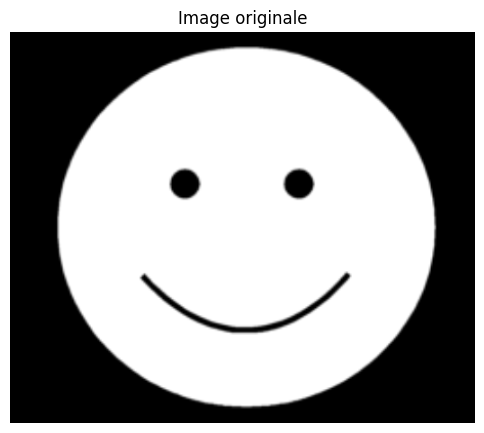

In [7]:
image = cv2.imread('ressources/smiley.png', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Impossible de lire l'image. Assurez-vous que le chemin du fichier est correct.")
else:
    print("Dimensions de l'image:", image.shape)

    # Affichage de l'image originale
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    plt.title('Image originale')
    plt.axis('off')
    plt.show()


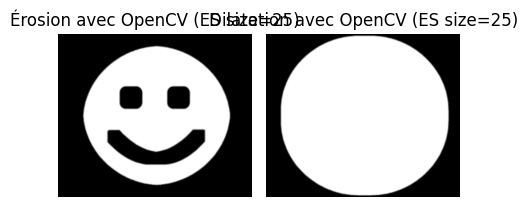

In [8]:
# Définition de la taille de l'élément structurant pour l'érosion et la dilatation
es_size = 25
element_structurant = cv2.getStructuringElement(cv2.MORPH_RECT, (es_size, es_size))

# Application de l'érosion et de la dilatation avec OpenCV
erosion = cv2.erode(image, element_structurant)
dilatation = cv2.dilate(image, element_structurant)


plt.subplot(1, 3, 2)
plt.imshow(erosion, cmap='gray')
plt.title('Érosion avec OpenCV (ES size=25)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dilatation, cmap='gray')
plt.title('Dilatation avec OpenCV (ES size=25)')
plt.axis('off')

plt.tight_layout()
plt.show()


In [3]:
# Définition des fonctions d'érosion et de dilatation manuelles
def erosion(image, i, j, es):
    min_val = 255
    for x in range(es.shape[0]):
        for y in range(es.shape[1]):
            if es[x, y] == 1:
                pixel_value = image[i - x, j - y]
                if pixel_value < min_val:
                    min_val = pixel_value
    return min_val

def dilatation(image, i, j, es):
    max_val = 0
    for x in range(es.shape[0]):
        for y in range(es.shape[1]):
            if es[x, y] == 1:
                pixel_value = image[i - x, j - y]
                if pixel_value > max_val:
                    max_val = pixel_value
    return max_val

def morpho_convolution(image, es, your_function):
    new_image = np.zeros(image.shape, np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i, j] = your_function(image, i, j, es)
    return new_image

# Application de l'érosion et de la dilatation manuelles
element_structurant_manuel = np.ones((es_size, es_size), np.uint8)
image_erode_manuel = morpho_convolution(image, element_structurant_manuel, erosion)
image_dilate_manuel = morpho_convolution(image, element_structurant_manuel, dilatation)

# Affichage des résultats de l'érosion et de la dilatation manuelles
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Image originale')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_erode_manuel, cmap='gray')
plt.title('Érosion manuelle (ES size=25)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_dilate_manuel, cmap='gray')
plt.title('Dilatation manuelle (ES size=25)')
plt.axis('off')

plt.tight_layout()
plt.show()


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 15)